In [2]:
import os
import pandas as pd
import pingouin as pg

nasa_csv = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'results_data', 'NASA_TLX.csv')
print(nasa_csv)
data = pd.read_csv(nasa_csv)
df = pd.melt(data, id_vars=['Participant', 'Modality'], value_vars=['MD', 'PD', 'TD', 'P', 'E', 'F'],
             var_name='Task_Load_Indicator', value_name='Score')

audio_tlx_mean = []
audio_tlx_std = []

vibro_tlx_mean = []
vibro_tlx_std = []

shape_tlx_mean = []
shape_tlx_std = []

# Perform Welch's ANOVA across modality for each task load indicator
grouped_modality = df.groupby('Task_Load_Indicator')
for indicator, indicator_data in grouped_modality:
    # print(f'\nTask Load Indicator: {indicator}')
    means = indicator_data.groupby('Modality')['Score'].mean()
    stds = indicator_data.groupby('Modality')['Score'].std()
    audio_tlx_mean.append(means[0])
    vibro_tlx_mean.append(means[2])
    shape_tlx_mean.append(means[1])
    audio_tlx_std.append(stds[0])
    vibro_tlx_std.append(stds[2])
    shape_tlx_std.append(stds[1])

print("----AUDIO----")
print(audio_tlx_mean)
print(audio_tlx_std)
print("----VIBRO----")
print(vibro_tlx_mean)
print(vibro_tlx_std)
print("----SHAPE----")
print(shape_tlx_mean)
print(shape_tlx_std)


# # Perform Welch's ANOVA across participants for each task load indicator
# grouped_participant = df.groupby('Task_Load_Indicator')
# for indicator, indicator_data in grouped_participant:
#     print(f'\nTask Load Indicator: {indicator}')
#     #result = pg.welch_anova(data=indicator_data, dv='Score', between='Participant')
#     means = indicator_data.groupby('Participant')['Score'].mean()
#     stds = indicator_data.groupby('Participant')['Score'].std()
#     #p_value = result['p-unc'][0]
#     print(f'Means:')
#     print(means)
#     print(f'Standard Deviations:')
#     print(stds)
#     # print(f'p-value: {p_value}')
#     # print(result)


C:\Users\matil/Desktop\FYP\code_env\eeg-notebooks\FYP\results_data\NASA_TLX.csv
----AUDIO----
[14.3, 12.9, 14.3, 10.5, 4.8, 10.5]
[3.16403399335581, 5.087020520675908, 3.7133393177689658, 4.696334267868457, 4.237399621885521, 5.60257877132387]
----VIBRO----
[12.8, 13.6, 13.9, 11.2, 9.9, 8.8]
[4.661902329879224, 4.926120853842978, 4.121757985239902, 4.1041983924323695, 6.806043066438988, 3.259175083088085]
----SHAPE----
[11.1, 11.0, 11.9, 8.1, 4.5, 8.6]
[3.9285281382896224, 4.618802153517006, 2.558211180579986, 2.998147576235848, 3.0276503540974917, 4.765617600176404]


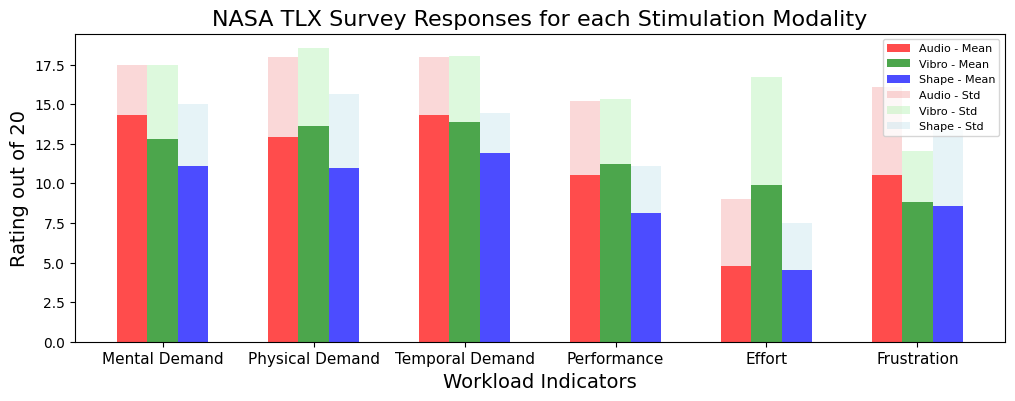

In [4]:
import matplotlib.pyplot as plt
import numpy as np



# Define the conditions and types
conditions = ['Audio', 'Vibro', 'Shape']
types = ['Mental Demand', 'Physical Demand','Temporal Demand', 'Performance', 'Effort', 'Frustration']

# Define the positions for the bars
x = np.arange(len(types))
bar_width = 0.2

# Create the bar chart
plt.figure(figsize=(12, 4))

# Plot mean bars
plt.bar(x, audio_tlx_mean, width=bar_width, align='center',
        label='Audio - Mean', alpha=0.7, color='red')

plt.bar(x + bar_width, vibro_tlx_mean, width=bar_width, align='center',
        label='Vibro - Mean', alpha=0.7, color='green')

plt.bar(x + 2 * bar_width, shape_tlx_mean, width=bar_width, align='center',
        label='Shape - Mean', alpha=0.7, color='blue')

# Plot standard deviation bars
plt.bar(x, audio_tlx_std, width=bar_width, align='center', bottom=audio_tlx_mean,
        alpha=0.3, color='lightcoral', label='Audio - Std')

plt.bar(x + bar_width, vibro_tlx_std, width=bar_width, align='center', bottom=vibro_tlx_mean,
        alpha=0.3, color='lightgreen',  label='Vibro - Std')

plt.bar(x + 2 * bar_width, shape_tlx_std, width=bar_width, align='center', bottom=shape_tlx_mean,
        alpha=0.3, color='lightblue',  label='Shape - Std')

# Customize the plot
plt.xlabel('Workload Indicators', fontsize=14)
plt.ylabel('Rating out of 20', fontsize=14)
plt.title('NASA TLX Survey Responses for each Stimulation Modality', fontsize=16)
plt.xticks(x + bar_width, types, fontsize=11)
plt.legend(fontsize=8)


In [6]:
print("Audio", np.mean(audio_tlx_mean))
print("Vibro", np.mean(vibro_tlx_mean))
print("Shape", np.mean(shape_tlx_mean))

Audio 11.216666666666667
Vibro 11.700000000000001
Shape 9.200000000000001


In [ ]:
# ----AUDIO----
[14.3, 12.9, 14.3, 10.5, 4.8, 10.5]
[3.16403399335581, 5.087020520675908, 3.7133393177689658, 4.696334267868457, 4.237399621885521, 5.60257877132387]
# ----VIBRO----
[12.8, 13.6, 13.9, 11.2, 9.9, 8.8]
[4.661902329879224, 4.926120853842978, 4.121757985239902, 4.1041983924323695, 6.806043066438988, 3.259175083088085]
# ----SHAPE----
[11.1, 11.0, 11.9, 8.1, 4.5, 8.6]
[3.9285281382896224, 4.618802153517006, 2.558211180579986, 2.998147576235848, 3.0276503540974917, 4.765617600176404]

# Perform the Brown-Forsythe test
_, p_value = stats.levene(trial1_wrong, trial2_wrong, center='median')

# Print the results
if p_value < 0.05:
    print("The variances are significantly different (p < 0.05), violating the assumption of homogeneous variance.")
else:
    print("The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance.", p_value)

result = pg.welch_anova(data=indicator_data, dv='Score', between='Modality')
p_value = result['p-unc'][0]
print(f'p-value: {p_value}')
print(result)

In [22]:
import pandas as pd

# Group the data by Modality
grouped_modality = data.groupby('Modality')

# Create an empty dictionary to store the results
nasa_results = {}

# Iterate over each modality
for modality, modality_data in grouped_modality:
    # Create an empty dictionary for the current modality
    nasa_results[modality] = {}
    
    # Iterate over each task load indicator
    for indicator in ['MD', 'PD', 'TD', 'P', 'E', 'F']:
        # Get the data for the current indicator and modality
        indicator_data = modality_data[indicator].values
        nasa_results[modality][indicator] = indicator_data
        
        # Print the array for the current indicator and modality
        print(f'{indicator}_{modality} =', indicator_data)

MD_A = [13  7 18 17 11 13 16 18 18 12]
PD_A = [ 3  4  1  1  1  6  4 14  4 10]
TD_A = [10  5  4 18  5  4 15 17 13 14]
P_A = [ 5 13 10 14  3 10 15 16 14  5]
E_A = [17 10 18 18 11 12 16 17 12 12]
F_A = [12  4 18 11  5 14 15 17 19 14]
MD_S = [11  9 15 16 11 11  9 15 10 12]
PD_S = [ 4  4  1  1  1  7  7  6  4 10]
TD_S = [ 6  6  4  7 17  4 10 16  5 11]
P_S = [ 3 12 10 11  8 10 10  7  5  5]
E_S = [14 11 13 11 19 11 11  9  4  8]
F_S = [14  8 15 11 21 11 10  7  7  6]
MD_V = [19 12 15 15 21 13 12  6 14 12]
PD_V = [20  5  6  1 21  8 13  7  4 14]
TD_V = [11  9  4  9 11  4 11  9  6 14]
P_V = [ 9 10 14  6 19 11 15  6  9 13]
E_V = [17  8 17 11 21 12 12  9  6 15]
F_V = [17 10 17 16 21 13 16  6 14  6]


In [34]:
import scipy.stats as stats
from scipy.stats import f_oneway
p_values = []

for indicator in nasa_results['A'].keys():
    # Perform the Brown-Forsythe test
    _, p_value = stats.levene(nasa_results['A'][indicator],nasa_results['V'][indicator],nasa_results['S'][indicator], center='median')
    print(indicator)
    # Print the results
    if p_value < 0.05:
        print("The variances are significantly different (p < 0.05), violating the assumption of homogeneous variance.")
    else:
        print("The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance.", p_value)

    # Perform one-way ANOVA
    f_value, p_value = f_oneway(nasa_results['A'][indicator], nasa_results['V'][indicator])

    # Print the results
    print(f"ANOVA results for {indicator} parameter")
    print("p-value:", p_value)
    p_values.append(p_value)
print(p_values)
# statistical difference: 
# A-S: E
# S-V: PD, P
# A-V: PD
 

MD
The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.4342485324739318
ANOVA results for MD parameter
p-value: 0.8222135470734757
PD
The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.12891821259618527
ANOVA results for PD parameter
p-value: 0.059479407876467105
TD
The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.1531650637163338
ANOVA results for TD parameter
p-value: 0.41773907431065294
P
The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.39348293874848633
ANOVA results for P parameter
p-value: 0.7267784230800989
E
The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.5904837137044943
ANOVA results for E parameter
p-value: 0.41089380141870024
F
The variances are not significantly diffe